# Worksheet

[QUIZZ](https://forms.gle/uV4XBp3pNBktVdHU8)

(Note: the rest of this worksheet is ungraded).

## Cost Function

Solving Data Science problems often starts by defining a metric with which to evaluate solutions were you able to find some. This metric is called a cost function. Data Science then backtracks and tries to find a process / algorithm to find solutions that can optimize for that cost function.

For example suppose you are asked to cluster three points A, B, C into two non-empty clusters. If someone gave you the solution `{A, B}, {C}`, how would you evaluate that this is a good solution?

Notice that because the clusters need to be non-empty and all points must be assigned to a cluster, it must be that two of the three points will be together in one cluster and the third will be alone in the other cluster.

In the above solution, if A and B are closer than A and C, and B and C, then this is a good solution. The smaller the distance between the two points in the same cluster (here A and B), the better the solution. So we can define our cost function to be that distance (between A and B here)!

The algorithm / process would involve clustering together the two closest points and put the third in its own cluster. This process optimizes for that cost function because no other pair of points could have a lower distance (although it could equal it).

### K means

a) (1-dimensional clustering) Walk through Lloyd's algorithm step by step on the following dataset:

`[0, .5, 1.5, 2, 6, 6.5, 7]` (note: each of these are 1-dimensional data points)

Given the initial centroids:

`[0, 2]`

b) Describe in plain english what the cost function for k means is.

c) For the same number of clusters K, why could there be very different solutions to the K means algorithm on a given dataset?

d) Do you think Lloyd's Algorithm always converges?

e) Follow along in class the implementation of Kmeans

```
pip install numpy pillow matplotlib scikit-learn ipykernel
```

In [44]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0], [2, 2], [-3, 2], [2, -4]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)

class KMeans():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [self.unassigned() for _ in range(len(data))]
        self.snaps = []

    def unassigned(self):
        return -1

    def snap(self, centers, iteration):
        TEMPFILE = "temp.png"

        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=self.assignment)
        ax.scatter(centers[:,0], centers[:, 1], c='r')
        ax.set_title(f"Iteration {iteration}")
        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)), self.k, replace=False)]

    def dist(self, a, b):
        return sum((a - b)**2) ** (1/2)

    def assign(self, centers):
        for i in range(len(self.data)):
            min_dist = self.dist(self.data[i], centers[0])
            self.assignment[i] = 0
            for j in range(1, self.k):
                if self.dist(self.data[i], centers[j]) < min_dist:
                    min_dist = self.dist(self.data[i], centers[j])
                    self.assignment[i] = j

    def compute_centers(self):
        new_centers = []
        for j in range(self.k):
            cluster = []
            for i in range(len(self.data)):
                if self.assignment[i] == j:
                    cluster.append(i)
            new_centers.append(np.mean(self.data[cluster], axis=0))
        return np.array(new_centers)

    def unassign(self):
        self.assignment = [self.unassigned() for _ in range(len(self.data))]

    def are_diff(self, x, y):
        return not np.array_equal(x, y)

    def lloyds(self):
        iteration = 0
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers, iteration)
        new_centers = self.compute_centers()
        self.snap(new_centers, iteration)
        while self.are_diff(centers, new_centers):
            iteration += 1
            centers = new_centers
            self.unassign()
            self.assign(centers)
            self.snap(centers, iteration)
            new_centers = self.compute_centers()
            self.snap(new_centers, iteration)

        return
            

kmeans = KMeans(X, 4)
kmeans.lloyds()
images = kmeans.snaps

images[0].save(
    'kmeans.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

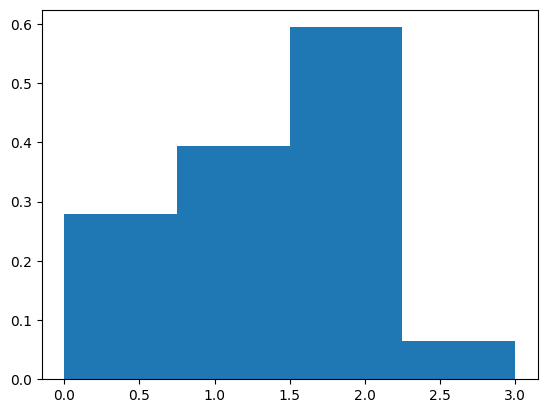

1.3344


In [45]:
import numpy as np
import matplotlib.pyplot as plt

def disagreement(P, C):
    total = 0
    for i in range(len(P)):
        for j in range(i, len(P)):
            if P[i] == P[j] and C[i] != C[j]:
                total +=1
            if P[i] != P[j] and C[i] == C[j]:
                total += 1
    return total

N = 3
tots = []
for i in range(100000):
    P = np.random.choice(range(N), size=N)
    C = np.random.choice(range(N), size=N)
    tots.append(disagreement(P, C))

plt.hist(tots, bins=int(N*(N-1)/2)+1, density=True)
plt.show()
print(np.mean(tots))